Import packages and load dataset

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import files
import io
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score
from sklearn.inspection import permutation_importance, plot_partial_dependence
!pip install shap
import shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
uploaded = files.upload()

Saving master_dataset.csv to master_dataset.csv


In [ ]:
df = pd.read_csv(io.BytesIO(uploaded['master_dataset.csv']))
print(df.shape)
print(df.columns.values)
df.head()

(7043, 52)
['Customer_ID' 'Gender' 'Age' 'Under_30' 'Senior_Citizen' 'Married'
 'Dependents' 'Number_of_Dependents' 'Referred_a_Friend'
 'Number_of_Referrals' 'Tenure_in_Months' 'Offer' 'Phone_Service'
 'Avg_Monthly_Long_Distance_Charges' 'Multiple_Lines' 'Internet_Service'
 'Internet_Type' 'Avg_Monthly_GB_Download' 'Online_Security'
 'Online_Backup' 'Device_Protection_Plan' 'Premium_Tech_Support'
 'Streaming_TV' 'Streaming_Movies' 'Streaming_Music' 'Unlimited_Data'
 'Contract' 'Paperless_Billing' 'Payment_Method' 'Monthly_Charge'
 'Total_Charges' 'Total_Refunds' 'Total_Extra_Data_Charges'
 'Total_Long_Distance_Charges' 'Total_Revenue' 'Satisfaction_Score'
 'Customer_Status' 'Churn_Label' 'Churn_Value' 'Churn_Score' 'CLTV'
 'Churn_Category' 'Churn_Reason' 'Location_ID' 'Country' 'State' 'City'
 'Zip_Code' 'Lat_Long' 'Latitude' 'Longitude' 'Population']


,Customer_ID,Gender,Age,Under_30,Senior_Citizen,Married,Dependents,Number_of_Dependents,Referred_a_Friend,Number_of_Referrals,...,Churn_Reason,Location_ID,Country,State,City,Zip_Code,Lat_Long,Latitude,Longitude,Population
0,8779-QRDMV,Male,78,No,Yes,No,No,0,No,0,...,Competitor offered more data,OXCZEW7397,United States,California,Los Angeles,90022,"34.02381, -118.156582",34.023810,-118.156582,68701
1,7495-OOKFY,Female,74,No,Yes,Yes,Yes,1,Yes,1,...,Competitor made better offer,FCCECI8494,United States,California,Los Angeles,90063,"34.044271, -118.185237",34.044271,-118.185237,55668
2,1658-BYGOY,Male,71,No,Yes,No,Yes,3,No,0,...,Competitor made better offer,HEHUQY7254,United States,California,Los Angeles,90065,"34.108833, -118.229715",34.108833,-118.229715,47534
3,4598-XLKNJ,Female,78,No,Yes,Yes,Yes,1,Yes,1,...,Limited range of services,WIUHRF2613,United States,California,Inglewood,90303,"33.936291, -118.332639",33.936291,-118.332639,27778
4,4846-WHAFZ,Female,80,No,Yes,Yes,Yes,1,Yes,1,...,Extra data charges,CFEZBF4415,United States,California,Whittier,90602,"33.972119, -118.020188",33.972119,-118.020188,26265


In [ ]:
df.describe()

,Age,Number_of_Dependents,Number_of_Referrals,Tenure_in_Months,Avg_Monthly_Long_Distance_Charges,Avg_Monthly_GB_Download,Monthly_Charge,Total_Charges,Total_Refunds,Total_Extra_Data_Charges,Total_Long_Distance_Charges,Total_Revenue,Satisfaction_Score,Churn_Value,Churn_Score,CLTV,Zip_Code,Latitude,Longitude,Population
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,46.509726,0.468692,1.951867,32.386767,22.958954,20.515405,64.761692,2280.381264,1.962182,6.860713,749.099262,3034.379056,3.244924,0.265370,58.505040,4400.295755,93486.071134,36.197455,-119.756684,22139.814568
std,16.750352,0.962802,3.001199,24.542061,15.448113,20.418940,30.090047,2266.220462,7.902614,25.104978,846.660055,2865.204542,1.201657,0.441561,21.170031,1183.057152,1856.768045,2.468929,2.154425,21152.174407
min,19.000000,0.000000,0.000000,1.000000,0.000000,0.000000,18.250000,18.800000,0.000000,0.000000,0.000000,21.360000,1.000000,0.000000,5.000000,2003.000000,90001.000000,32.555828,-124.301372,11.000000
25%,32.000000,0.000000,0.000000,9.000000,9.210000,3.000000,35.500000,400.150000,0.000000,0.000000,70.545000,605.610000,3.000000,0.000000,40.000000,3469.000000,92101.000000,33.990646,-121.788090,2344.000000
50%,46.000000,0.000000,0.000000,29.000000,22.890000,17.000000,70.350000,1394.550000,0.000000,0.000000,401.440000,2108.640000,3.000000,0.000000,61.000000,4527.000000,93518.000000,36.205465,-119.595293,17554.000000
75%,60.000000,0.000000,3.000000,55.000000,36.395000,27.000000,89.850000,3786.600000,0.000000,0.000000,1191.100000,4801.145000,4.000000,1.000000,75.500000,5380.500000,95329.000000,38.161321,-117.969795,36125.000000
max,80.000000,9.000000,11.000000,72.000000,49.990000,85.000000,118.750000,8684.800000,49.790000,150.000000,3564.720000,11979.340000,5.000000,1.000000,96.000000,6500.000000,96150.000000,41.962127,-114.192901,105285.000000


Transform and engineer features

In [ ]:
df['gender_flag'] = df['Gender'].map({'Male': 0, 'Female':1}).fillna(-1)
df['married_flag'] = df['Married'].map({'No':0, 'Yes':1}).fillna(-1)
df['multiple_lines_flag'] = df['Multiple_Lines'].map({'No':0, 'Yes':1}).fillna(-1)
df['internet_flag'] = df['Internet_Service'].map({'No':0, 'Yes':1}).fillna(-1)
df['online_backup_flag'] = df['Online_Backup'].map({'No':0, 'Yes':1}).fillna(-1)
df['dev_protplan_flag'] = df['Device_Protection_Plan'].map({'No':0, 'Yes':1}).fillna(-1)
df['stream_tv_flag'] = df['Streaming_TV'].map({'No':0, 'Yes':1}).fillna(-1)
df['unlimited_data_flag'] = df['Unlimited_Data'].map({'No':0, 'Yes':1}).fillna(-1)
df['contract_flag'] = df['Contract'].map({'Month-to-Month':0,'One Year':1,'Two Year':2}).fillna(-1)
df['paperless_bill_flag'] = df['Paperless_Billing'].map({'No':0, 'Yes':1}).fillna(-1)
df['referred_minus_spouse'] = df['Number_of_Referrals'] - np.where(df['Married'] == 'Yes', 1, 0)
df['sum_positives'] = df['multiple_lines_flag'] + df['internet_flag'] + df['online_backup_flag'] + df['dev_protplan_flag'] + \
                      df['stream_tv_flag'] + df['unlimited_data_flag'] + df['contract_flag'] + df['paperless_bill_flag']

In [ ]:
df['adults'] = df['Married'].map({'No':1, 'Yes':2}).fillna(-1)
df['hh_size'] = df['adults'] + df['Number_of_Dependents'] 
df['mc_hh_ratio'] = df['Monthly_Charge'] / df['hh_size'] 
df['amgbd_hh_ratio'] = df['Avg_Monthly_GB_Download'] / df['hh_size'] 
df['tldc_hh_ratio'] = df['Total_Long_Distance_Charges'] / df['hh_size'] 
df['tr_hh_ratio'] = df['Total_Revenue'] / df['hh_size'] 
df['tc_hh_ratio'] = df['Total_Charges'] / df['hh_size'] 
df['amldc_hh_ratio'] = df['Avg_Monthly_Long_Distance_Charges'] / df['hh_size'] 
df['tec_hh_ratio'] = df['Total_Extra_Data_Charges'] / df['hh_size']

In [ ]:
df['tr_mc_ratio'] = df['Total_Revenue'] / df['Monthly_Charge']
df['tec_mc_ratio'] = df['Total_Extra_Data_Charges'] / df['Monthly_Charge']
df['tldc_amldc_ratio'] = df['Total_Long_Distance_Charges'] / df['Avg_Monthly_Long_Distance_Charges']
df['tc_amgbd_ratio'] = (df['Total_Charges'] / df['Avg_Monthly_GB_Download'])
df['tenure_cltv_ratio'] = df['Tenure_in_Months'] / df['CLTV']
df['tenure_age_ratio'] = (df['Tenure_in_Months']*12) / df['Age']

In [ ]:
df['phone_flag'] = df['Phone_Service'].map({'No':0, 'Yes':1}).fillna(-1)
df['online_security_flag'] = df['Online_Security'].map({'No':0, 'Yes':1}).fillna(-1)
df['prem_tech_flag'] = df['Premium_Tech_Support'].map({'No':0, 'Yes':1}).fillna(-1)
df['stream_movie_flag'] = df['Streaming_Movies'].map({'No':0, 'Yes':1}).fillna(-1)
df['stream_music_flag'] = df['Streaming_Music'].map({'No':0, 'Yes':1}).fillna(-1)
df['nbr_srvcs'] = df['phone_flag'] + df['internet_flag'] + df['multiple_lines_flag'] + df['unlimited_data_flag']
df['nbr_addon'] = df['online_security_flag'] + df['online_backup_flag'] + df['dev_protplan_flag'] + df['prem_tech_flag']
df['nbr_stream'] = df['stream_tv_flag'] + df['stream_movie_flag'] + df['stream_music_flag']
df['total_nbr_srvcs'] = df['nbr_srvcs'] + df['nbr_addon'] + df['nbr_stream']
df['internet_type_flag'] = df['Internet_Type'].map({'DSL':0, 'Cable':1, 'Fiber Optic':2}).fillna(-1)
df['payment_method_flag'] = df['Payment_Method'].map({'Bank Withdrawal':0,'Credit Card':1,'Mailed Check':2}).fillna(-1)
df['referred_friend_flag'] = df['Referred_a_Friend'].map({'No':0, 'Yes':1}).fillna(-1)

In [ ]:
df = df.set_index('Customer_ID')

Examine correlations and discard redundant features

In [ ]:
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

,Age,Number_of_Dependents,Number_of_Referrals,Tenure_in_Months,Avg_Monthly_Long_Distance_Charges,Avg_Monthly_GB_Download,Monthly_Charge,Total_Charges,Total_Refunds,Total_Extra_Data_Charges,Total_Long_Distance_Charges,Total_Revenue,Satisfaction_Score,Churn_Value,Churn_Score,CLTV,Zip_Code,Latitude,Longitude,Population,gender_flag,married_flag,multiple_lines_flag,internet_flag,online_backup_flag,dev_protplan_flag,stream_tv_flag,unlimited_data_flag,contract_flag,paperless_bill_flag,referred_minus_spouse,sum_positives,adults,hh_size,mc_hh_ratio,amgbd_hh_ratio,tldc_hh_ratio,tr_hh_ratio,tc_hh_ratio,amldc_hh_ratio,tec_hh_ratio,tr_mc_ratio,tec_mc_ratio,tldc_amldc_ratio,tc_amgbd_ratio,tenure_cltv_ratio,tenure_age_ratio,phone_flag,online_security_flag,prem_tech_flag,stream_movie_flag,stream_music_flag,nbr_srvcs,nbr_addon,nbr_stream,total_nbr_srvcs,internet_type_flag,payment_method_flag,referred_friend_flag
Age,1.000000,-0.119000,-0.025141,0.009927,-0.011749,-0.376595,0.144685,0.059684,0.024168,0.025036,0.003065,0.048265,-0.085170,0.115760,0.083919,-0.001826,-0.008183,-0.010305,0.007612,-0.018872,-0.002186,-0.003666,0.103122,0.117346,0.035541,0.028491,0.059760,0.084353,0.027870,0.100723,-0.027364,0.121182,-0.003666,-0.095404,0.142640,-0.321260,0.027642,0.076567,0.087150,0.016582,0.033538,-0.025037,0.018642,0.009695,0.192274,0.019652,-0.413838,0.009965,-0.038001,-0.043760,0.073458,-0.155400,0.130604,-0.005143,-0.007532,0.043520,0.168688,-0.112154,-0.004702
Number_of_Dependents,-0.119000,1.000000,0.278003,0.108237,-0.007324,0.129966,-0.131837,0.022535,0.014023,-0.014436,0.068966,0.038038,0.152873,-0.218780,-0.160743,0.049611,0.016493,0.029081,-0.024271,-0.015491,-0.005840,0.324205,-0.030307,-0.153137,0.001721,-0.019925,-0.052981,-0.113853,0.146790,-0.106814,0.249891,-0.041876,0.324205,0.921886,-0.506576,-0.230168,-0.204808,-0.260417,-0.255152,-0.358101,-0.082395,0.137397,-0.007292,0.112983,-0.108935,0.094901,0.131970,-0.010149,0.041977,0.022094,-0.065215,-0.033048,-0.123851,0.015825,-0.058681,-0.064870,-0.163486,0.061427,0.309319
Number_of_Referrals,-0.025141,0.278003,1.000000,0.326975,0.006336,0.038575,0.028173,0.250378,0.024756,0.000350,0.216190,0.261853,0.188926,-0.286540,-0.202209,0.122843,0.001463,0.018715,-0.009893,-0.007702,0.009074,0.672867,0.078080,-0.038984,0.112369,0.116695,0.079687,-0.005813,0.290369,-0.044888,0.990514,0.174846,0.672867,0.494967,-0.389291,-0.219071,-0.048718,-0.047577,-0.041912,-0.313316,-0.065047,0.292743,-0.005006,0.326152,0.109846,0.295560,0.278782,0.009947,0.142416,0.107725,0.057821,0.051349,0.020927,0.172628,0.073191,0.116413,-0.057338,0.016289,0.708291
Tenure_in_Months,0.009927,0.108237,0.326975,1.000000,0.014596,0.049119,0.247582,0.826074,0.059021,0.082266,0.674149,0.853146,0.210557,-0.352861,-0.224982,0.396292,0.007146,0.011963,-0.009672,-0.012104,-0.005162,0.380394,0.332101,0.038582,0.360558,0.360935,0.279928,0.031194,0.646632,0.005743,0.294082,0.546830,0.380394,0.241213,-0.058922,-0.097966,0.525501,0.667057,0.654817,-0.161368,0.040485,0.866619,0.051136,1.000000,0.440258,0.898626,0.822091,0.008271,0.327543,0.324554,0.285926,0.238082,0.181465,0.496002,0.311456,0.423834,0.033301,-0.052729,0.361844
Avg_Monthly_Long_Distance_Charges,-0.011749,-0.007324,0.006336,0.014596,1.000000,-0.030455,0.138396,0.069500,-0.018644,0.002414,0.599828,0.232291,0.001146,0.008120,0.021857,0.023858,0.005894,0.002631,-0.004341,-0.018669,-0.010130,0.010215,0.136004,-0.068605,-0.013909,-0.031869,0.001641,-0.053273,-0.002515,0.018673,0.005171,0.000008,0.010215,-0.001596,0.107798,-0.010717,0.542442,0.210661,0.066230,0.779418,0.012872,0.250190,-0.040043,0.012713,0.054003,0.001723,0.012531,0.486673,-0.028108,-0.048217,0.003612,0.008044,0.145420,-0.043786,0.005123,0.037350,0.069889,-0.016536,0.008702
Avg_Monthly_GB_Download,-0.376595,0.129966,0.038575,0.049119,-0.030455,1.000000,0.391787,0.223268,0.002397,0.088939,0.011373,0.180726,-0.091657,0.048868,0.022421,0.023043,-0.010998,-0.027676,0.030979,0.024759,0.014065,0.056745,0.091679,0.5

In [ ]:
keep = ['Age', 'hh_size', 'referred_minus_spouse', 'tenure_age_ratio', 'amldc_hh_ratio', 'amgbd_hh_ratio', 
        'mc_hh_ratio', 'tc_hh_ratio',  'tr_mc_ratio', 'tec_mc_ratio', 
        'tenure_cltv_ratio',  'gender_flag', 'married_flag', 'multiple_lines_flag',
        'internet_flag', 'online_backup_flag', 'dev_protplan_flag', 'stream_tv_flag', 'unlimited_data_flag', 
        'contract_flag', 'paperless_bill_flag', 'sum_positives', 'phone_flag', 'online_security_flag', 
        'prem_tech_flag', 'nbr_addon', 'nbr_stream', 
        'internet_type_flag', 'payment_method_flag', 'Latitude', 'Longitude', 'Population']
corr = df[keep].corr()
corr.style.background_gradient(cmap='coolwarm')

,Age,hh_size,referred_minus_spouse,tenure_age_ratio,amldc_hh_ratio,amgbd_hh_ratio,mc_hh_ratio,tc_hh_ratio,tr_mc_ratio,tec_mc_ratio,tenure_cltv_ratio,gender_flag,married_flag,multiple_lines_flag,internet_flag,online_backup_flag,dev_protplan_flag,stream_tv_flag,unlimited_data_flag,contract_flag,paperless_bill_flag,sum_positives,phone_flag,online_security_flag,prem_tech_flag,nbr_addon,nbr_stream,internet_type_flag,payment_method_flag,Latitude,Longitude,Population
Age,1.000000,-0.095404,-0.027364,-0.413838,0.016582,-0.321260,0.142640,0.087150,-0.025037,0.018642,0.019652,-0.002186,-0.003666,0.103122,0.117346,0.035541,0.028491,0.059760,0.084353,0.027870,0.100723,0.121182,0.009965,-0.038001,-0.043760,-0.005143,-0.007532,0.168688,-0.112154,-0.010305,0.007612,-0.018872
hh_size,-0.095404,1.000000,0.428536,0.235531,-0.466300,-0.308202,-0.616484,-0.234685,0.244768,-0.005255,0.217693,-0.003868,0.665414,0.034269,-0.121092,0.059313,0.047266,0.009254,-0.082144,0.229573,-0.090380,0.059831,-0.000757,0.091738,0.066584,0.095081,0.006208,-0.129563,0.034340,0.023381,-0.017662,-0.015457
referred_minus_spouse,-0.027364,0.428536,1.000000,0.251393,-0.266184,-0.186970,-0.335958,-0.031630,0.264719,-0.005810,0.264933,0.009786,0.564834,0.060711,-0.043372,0.099064,0.101607,0.065734,-0.009976,0.272324,-0.047309,0.152921,0.007807,0.132283,0.097877,0.155110,0.057829,-0.063707,0.024580,0.020679,-0.011711,-0.007125
tenure_age_ratio,-0.413838,0.235531,0.251393,1.000000,-0.140445,0.093697,-0.089106,0.501752,0.724587,0.044070,0.734854,-0.000774,0.320799,0.239176,0.004837,0.284197,0.292605,0.213622,0.003200,0.534790,-0.022856,0.420556,0.001379,0.287132,0.283829,0.414006,0.269591,-0.015814,-0.011435,0.006757,-0.007463,0.003405
amldc_hh_ratio,0.016582,-0.466300,-0.266184,-0.140445,1.000000,0.182820,0.444298,0.155307,0.011602,-0.023561,-0.154863,-0.003973,-0.448562,0.055377,-0.006670,-0.064939,-0.074767,-0.024407,-0.016933,-0.144465,0.035919,-0.074330,0.376301,-0.087571,-0.089434,-0.113906,-0.021682,0.106857,-0.021977,-0.000983,-0.002279,-0.008804
amgbd_hh_ratio,-0.321260,-0.308202,-0.186970,0.093697,0.182820,1.000000,0.492905,0.223822,-0.201954,0.067447,-0.091044,0.016763,-0.309039,0.045540,0.455376,0.128540,0.128454,0.151080,0.332961,-0.185881,0.145418,0.212297,-0.077883,0.117688,0.129478,0.181925,0.212532,0.341410,-0.094496,-0.030104,0.029554,0.030438
mc_hh_ratio,0.142640,-0.616484,-0.335958,-0.089106,0.444298,0.492905,1.000000,0.570652,-0.204197,0.031127,-0.052536,0.026198,-0.529187,0.282463,0.560015,0.211945,0.241444,0.381043,0.415869,-0.204051,0.282167,0.415837,0.178735,0.091546,0.141442,0.249477,0.422663,0.660382,-0.224710,-0.023367,0.017733,0.017591
tc_hh_ratio,0.087150,-0.234685,-0.031630,0.501752,0.155307,0.223822,0.570652,1.000000,0.426836,0.056825,0.592493,0.011089,-0.081413,0.405730,0.346861,0.418103,0.436912,0.443954,0.262716,0.313848,0.159383,0.639822,0.098258,0.318084,0.350397,0.551096,0.491547,0.392398,-0.129073,-0.010190,0.008397,0.003452
tr_mc_ratio,-0.025037,0.244768,0.264719,0.724587,0.011602,-0.201954,-0.204197,0.426836,1.000000,0.009141,0.781792,-0.006093,0.332894,0.225678,-0.252544,0.165555,0.155667,0.079572,-0.193779,0.627262,-0.087623,0.266511,0.123857,0.158477,0.147817,0.226446,0.085995,-0.191302,0.007773,0.017943,-0.019030,-0.017456
tec_mc_ratio,0.018642,-0.005255,-0.005810,0.044070,-0.023561,0.067447,0.031127,0.056825,0.009141,1.000000,0.051088,0.002907,0.001218,0.007441,0.135548,0.071017,0.043639,0.022635,-0.370347,-0.010288,0.011452,-0.023091,-0.109446,0.055214,0.075496,0.088374,0.038305,0.051051,-0.029086,-0.010622,0.007777,0.009198


Decide on model algorithm, NB vs RF vs XGB

In [ ]:
print(len(keep))
X = df[keep]
y = df['Churn_Value']
X_build, X_holdout, y_build, y_holdout = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)
X_train, X_test, y_train, y_test = train_test_split(X_build, y_build, test_size=0.2, random_state=0, stratify=y_build)

32


In [ ]:
def metrics(y, y_pred, y_prob):
  print(confusion_matrix(y,y_pred))
  tn, fp, fn, tp = confusion_matrix(y,y_pred).ravel()
  print(tn, fp, fn, tp)
  print(classification_report(y,y_pred))
  print(accuracy_score(y, y_pred))
  print(roc_auc_score(y, y_prob))

In [ ]:
nbc = GaussianNB()
nbc.fit(X_train, y_train)
metrics(y_test, nbc.predict(X_test), nbc.predict_proba(X_test)[:,1])

[[574 254]
 [ 44 255]]
574 254 44 255
              precision    recall  f1-score   support

           0       0.93      0.69      0.79       828
           1       0.50      0.85      0.63       299

    accuracy                           0.74      1127
   macro avg       0.71      0.77      0.71      1127
weighted avg       0.82      0.74      0.75      1127

0.735581188997338
0.8451278819898858


In [ ]:
rfc = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=0)
rfc.fit(X_train, y_train)
metrics(y_test, rfc.predict(X_test), rfc.predict_proba(X_test)[:,1])

[[770  58]
 [127 172]]
770 58 127 172
              precision    recall  f1-score   support

           0       0.86      0.93      0.89       828
           1       0.75      0.58      0.65       299

    accuracy                           0.84      1127
   macro avg       0.80      0.75      0.77      1127
weighted avg       0.83      0.84      0.83      1127

0.8358473824312334
0.8945640056226067


In [ ]:
gbc = XGBClassifier(objective='binary:logistic', eval_metric='auc',
                    use_label_encoder=False, random_state=0, 
                    n_estimators=100, max_depth=5, learning_rate=0.05)
gbc.fit(X_train, y_train)
metrics(y_test, gbc.predict(X_test), gbc.predict_proba(X_test)[:,1])

[[764  64]
 [ 95 204]]
764 64 95 204
              precision    recall  f1-score   support

           0       0.89      0.92      0.91       828
           1       0.76      0.68      0.72       299

    accuracy                           0.86      1127
   macro avg       0.83      0.80      0.81      1127
weighted avg       0.86      0.86      0.86      1127

0.8589174800354925
0.9122962208973552


Trim features balancing simplicity and performance

In [ ]:
def plot_fi(fi, X, fsize):
  importances = fi['importances_mean']
  imp_errors = fi['importances_std']
  scale = np.max(importances)
  y_pos = np.arange(X.columns.size)
  sortme = np.argsort(importances)
  plt.figure(figsize=fsize)
  plt.barh(y_pos, importances[sortme]/scale, alpha=0.3, xerr = imp_errors[sortme]/scale)
  plt.yticks(y_pos, X.columns[sortme])
  plt.xlabel('Feature importance')
  plt.show()

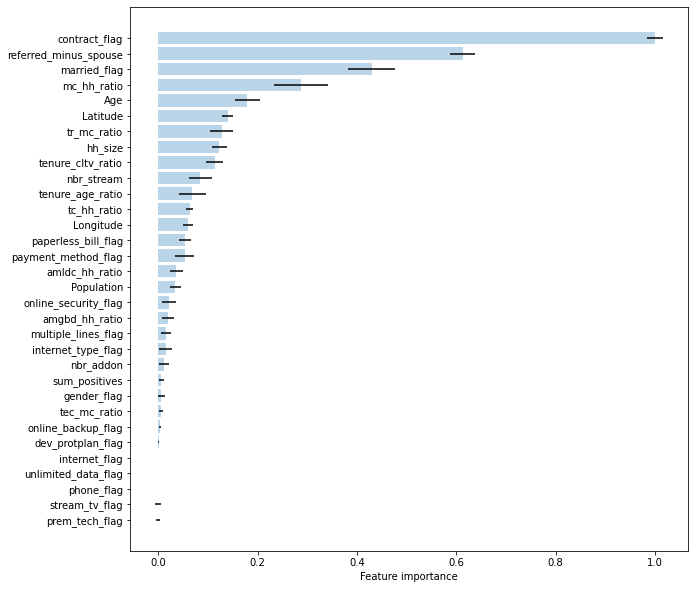

In [ ]:
r = permutation_importance(gbc, X_train, y_train, n_repeats=10, random_state=0)
plot_fi(r, X_train, (10,10))

0.9106199408656875


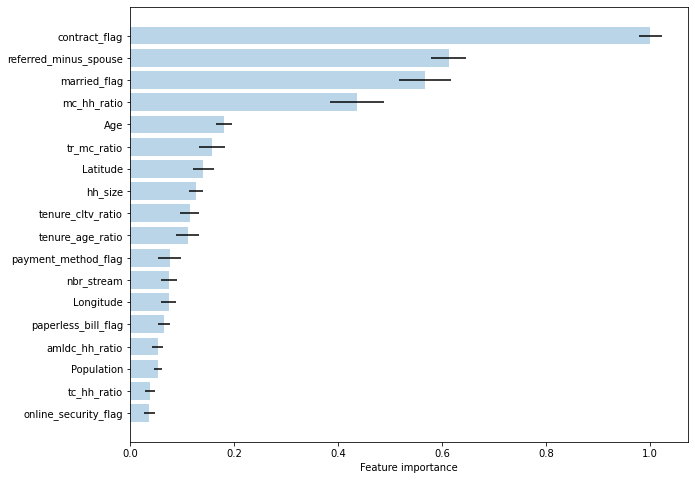

In [ ]:
keep18 = ['contract_flag','referred_minus_spouse','married_flag','mc_hh_ratio','Age','Latitude','tr_mc_ratio',
          'hh_size','tenure_cltv_ratio','nbr_stream','tenure_age_ratio','tc_hh_ratio','Longitude',
          'paperless_bill_flag','payment_method_flag','amldc_hh_ratio','Population','online_security_flag']
X_traina = X_train.copy()
X_testa = X_test.copy()
X_train = X_traina[keep18]
X_test = X_testa[keep18]
gbc.fit(X_train, y_train)
print(roc_auc_score(y_test, gbc.predict_proba(X_test)[:,1]))
r = permutation_importance(gbc, X_train, y_train, n_repeats=10, random_state=0)
plot_fi(r, X_train, (10,8))

0.912861712956231


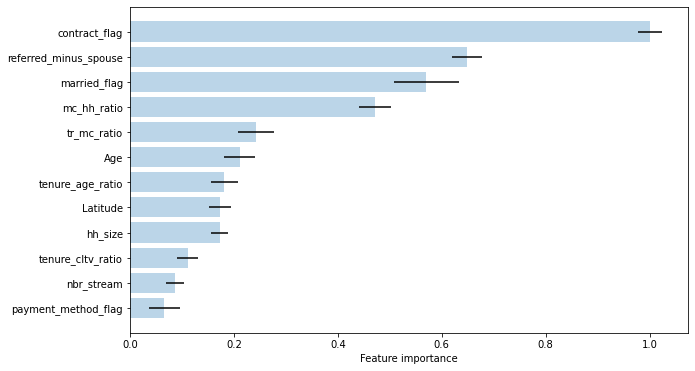

In [ ]:
keep12 = ['contract_flag','referred_minus_spouse','married_flag','mc_hh_ratio','Age','tr_mc_ratio','Latitude',
          'hh_size','tenure_cltv_ratio','tenure_age_ratio','payment_method_flag','nbr_stream']
X_train = X_traina[keep12]
X_test = X_testa[keep12]
gbc.fit(X_train, y_train)
print(roc_auc_score(y_test, gbc.predict_proba(X_test)[:,1]))
r = permutation_importance(gbc, X_train, y_train, n_repeats=10, random_state=0)
plot_fi(r, X_train, (10,6))

0.9099231738645727


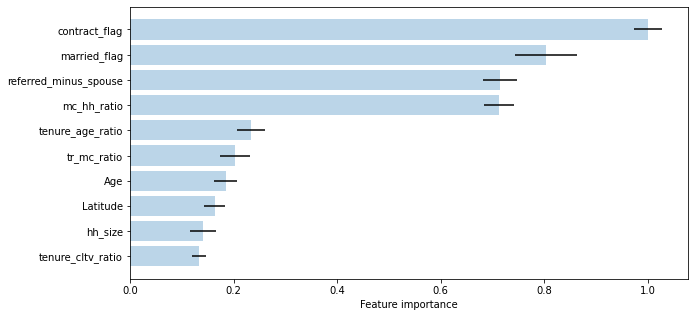

In [ ]:
keep10 = ['contract_flag','referred_minus_spouse','married_flag','mc_hh_ratio','tr_mc_ratio','Age',
          'tenure_age_ratio','Latitude','hh_size','tenure_cltv_ratio']
X_train = X_traina[keep10]
X_test = X_testa[keep10]
gbc.fit(X_train, y_train)
print(roc_auc_score(y_test, gbc.predict_proba(X_test)[:,1]))
r = permutation_importance(gbc, X_train, y_train, n_repeats=10, random_state=0)
plot_fi(r, X_train, (10,5))

0.9093839367941448


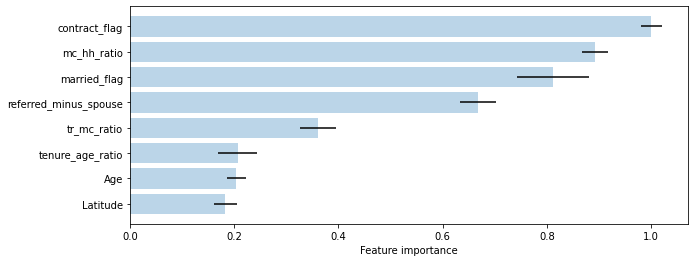

In [ ]:
keep8 = ['contract_flag','referred_minus_spouse','married_flag','mc_hh_ratio',
         'tr_mc_ratio','Age','tenure_age_ratio','Latitude']
X_train = X_traina[keep8]
X_test = X_testa[keep8]
gbc.fit(X_train, y_train)
print(roc_auc_score(y_test, gbc.predict_proba(X_test)[:,1]))
r = permutation_importance(gbc, X_train, y_train, n_repeats=10, random_state=0)
plot_fi(r, X_train, (10,4))

0.8992050797343804


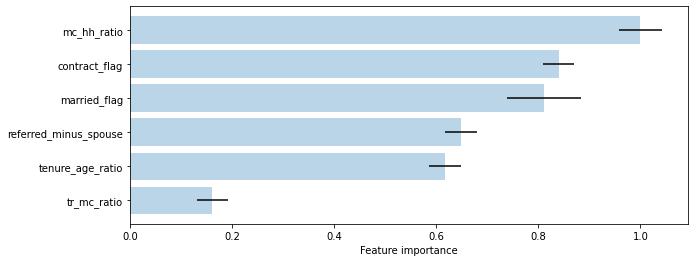

In [ ]:
keep6 = ['contract_flag','mc_hh_ratio','married_flag','referred_minus_spouse','tr_mc_ratio','tenure_age_ratio']
X_train = X_traina[keep6]
X_test = X_testa[keep6]
gbc.fit(X_train, y_train)
print(roc_auc_score(y_test, gbc.predict_proba(X_test)[:,1]))
r = permutation_importance(gbc, X_train, y_train, n_repeats=10, random_state=0)
plot_fi(r, X_train, (10,4))

0.8740083692824713


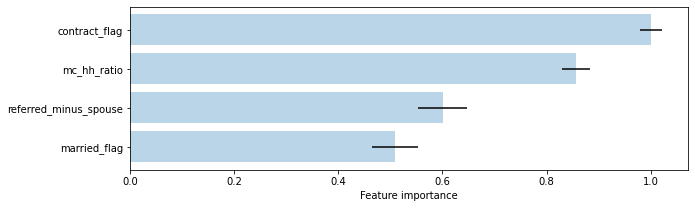

In [ ]:
keep4 = ['mc_hh_ratio','contract_flag','married_flag','referred_minus_spouse']
X_train = X_traina[keep4]
X_test = X_testa[keep4]
gbc.fit(X_train, y_train)
print(roc_auc_score(y_test, gbc.predict_proba(X_test)[:,1]))
r = permutation_importance(gbc, X_train, y_train, n_repeats=10, random_state=0)
plot_fi(r, X_train, (10,3))

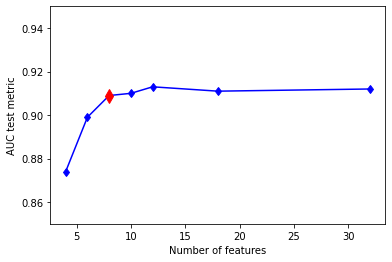

In [ ]:
nf = [32,18,12,10,8,6,4]
auc = [0.912,0.911,0.913,0.910,0.909,0.899,0.874]
plt.figure()
plt.plot(nf, auc, '-bd')
plt.plot([8],[0.909],'rd',markersize=10)
plt.xlabel('Number of features')
plt.ylabel('AUC test metric')
plt.ylim(0.85,0.95)
plt.show()

Tune hyperparameters 

In [ ]:
X_train = X_traina[keep8]
X_test = X_testa[keep8]
gbc = XGBClassifier(objective='binary:logistic', eval_metric='auc',
                    use_label_encoder=False, random_state=0)
grid = {'n_estimators': [50,100,200], 'max_depth': [3,5,7], 'learning_rate': [0.01,0.05,0.2]}
xgbgs = GridSearchCV(estimator = gbc, param_grid = grid, cv = 3)
model = xgbgs.fit(X_train, y_train)
model.best_params_

{'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 50}

In [ ]:
gbc = XGBClassifier(objective='binary:logistic', eval_metric='auc',
                    use_label_encoder=False, random_state=0, 
                    n_estimators=50, max_depth=5, learning_rate=0.05)
gbc.fit(X_train, y_train)
metrics(y_test, gbc.predict(X_test), gbc.predict_proba(X_test)[:,1])

[[765  63]
 [100 199]]
765 63 100 199
              precision    recall  f1-score   support

           0       0.88      0.92      0.90       828
           1       0.76      0.67      0.71       299

    accuracy                           0.86      1127
   macro avg       0.82      0.79      0.81      1127
weighted avg       0.85      0.86      0.85      1127

0.8553682342502218
0.9109390399560532


Train on build data and evaluate performance on holdout

In [ ]:
gbc = XGBClassifier(objective='binary:logistic', eval_metric='auc',
                    use_label_encoder=False, random_state=0, 
                    n_estimators=50, max_depth=5, learning_rate=0.05)
gbc.fit(X_build[keep8], y_build)
metrics(y_build, gbc.predict(X_build[keep8]), gbc.predict_proba(X_build[keep8])[:,1])
metrics(y_holdout, gbc.predict(X_holdout[keep8]), gbc.predict_proba(X_holdout[keep8])[:,1])

[[3793  346]
 [ 472 1023]]
3793 346 472 1023
              precision    recall  f1-score   support

           0       0.89      0.92      0.90      4139
           1       0.75      0.68      0.71      1495

    accuracy                           0.85      5634
   macro avg       0.82      0.80      0.81      5634
weighted avg       0.85      0.85      0.85      5634

0.8548100816471423
0.918810224304095
[[944  91]
 [126 248]]
944 91 126 248
              precision    recall  f1-score   support

           0       0.88      0.91      0.90      1035
           1       0.73      0.66      0.70       374

    accuracy                           0.85      1409
   macro avg       0.81      0.79      0.80      1409
weighted avg       0.84      0.85      0.84      1409

0.8459900638750887
0.907335503371309


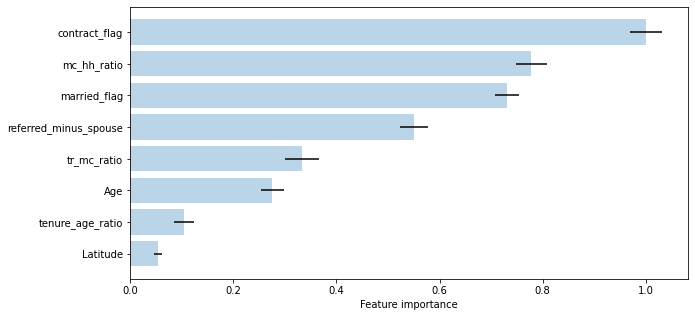

In [ ]:
X8 = X[keep8]
r = permutation_importance(gbc, X8, y, n_repeats=10, random_state=0)
plot_fi(r, X8, (10,5))

In [ ]:
print("\n".join("{} {}".format(x, y) for x, y in zip(X8.columns.values, r['importances_mean'])))

contract_flag 0.08012210705665201
referred_minus_spouse 0.044100525344313524
married_flag 0.058497799233281265
mc_hh_ratio 0.06234559136731508
tr_mc_ratio 0.026735766008803098
Age 0.02207865966207584
tenure_age_ratio 0.008334516541246628
Latitude 0.004373136447536574


Examine partial dependence of features

Function plot_partial_dependence is deprecated; Function `plot_partial_dependence` is deprecated in 1.0 and will be removed in 1.2. Use PartialDependenceDisplay.from_estimator instead


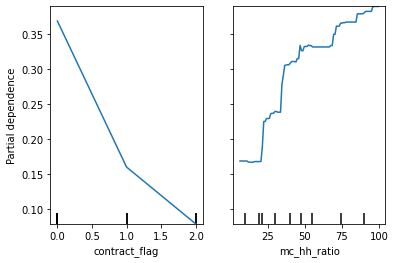

In [ ]:
plot_partial_dependence(gbc, X8, ['contract_flag','mc_hh_ratio'])

Function plot_partial_dependence is deprecated; Function `plot_partial_dependence` is deprecated in 1.0 and will be removed in 1.2. Use PartialDependenceDisplay.from_estimator instead


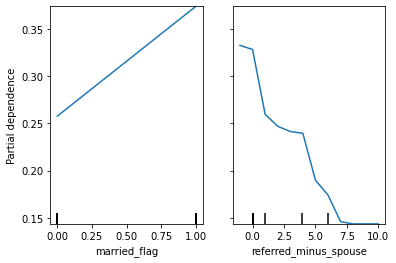

In [ ]:
plot_partial_dependence(gbc, X8, ['married_flag','referred_minus_spouse'])

Function plot_partial_dependence is deprecated; Function `plot_partial_dependence` is deprecated in 1.0 and will be removed in 1.2. Use PartialDependenceDisplay.from_estimator instead


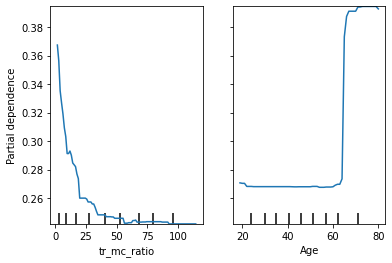

In [ ]:
plot_partial_dependence(gbc, X8, ['tr_mc_ratio','Age'])

Function plot_partial_dependence is deprecated; Function `plot_partial_dependence` is deprecated in 1.0 and will be removed in 1.2. Use PartialDependenceDisplay.from_estimator instead


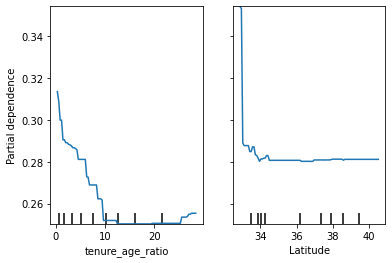

In [ ]:
plot_partial_dependence(gbc, X8, ['tenure_age_ratio','Latitude'])

Confirm interpretability with shap, and examine individual predictions

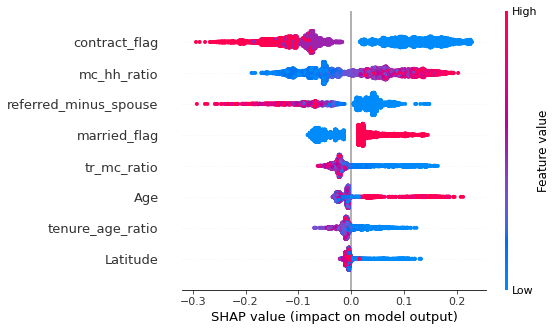

In [ ]:
explainer = shap.TreeExplainer(gbc, model_output='probability', data=X8)
shap_values = explainer.shap_values(X8)
shap.summary_plot(shap_values, X8)

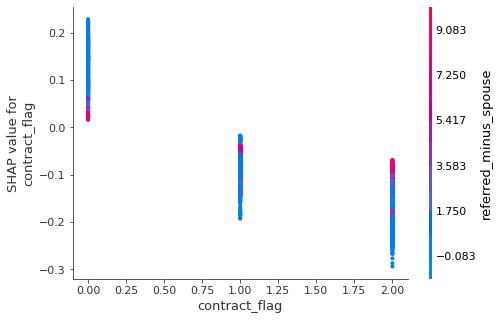

In [ ]:
shap.dependence_plot('contract_flag', shap_values, X8)

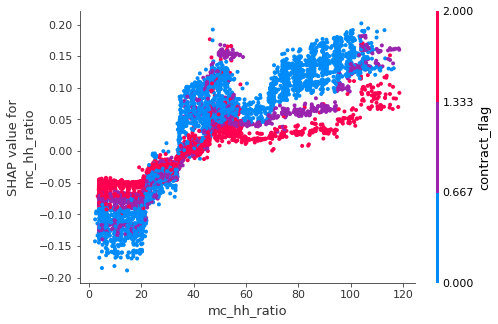

In [ ]:
shap.dependence_plot('mc_hh_ratio', shap_values, X8)

In [ ]:
shap.initjs()
display(shap.force_plot(explainer.expected_value, shap_values[123], X8.iloc[123]))

In [ ]:
shap.initjs()
display(shap.force_plot(explainer.expected_value, shap_values[456], X8.iloc[456]))

In [ ]:
shap.initjs()
display(shap.force_plot(explainer.expected_value, shap_values[789], X8.iloc[789]))

In [ ]:
cols = ['contract_flag','referred_minus_spouse','married_flag','mc_hh_ratio',
         'tr_mc_ratio','Age','tenure_age_ratio','Latitude',
         'Churn_Value','City','Zip_Code','Location_ID']
dfo = df[cols]
dfo['PredClass'] = gbc.predict(dfo[keep8])
dfo['PredProb'] = gbc.predict_proba(dfo[keep8])[:,1]
dfo.head()


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,contract_flag,referred_minus_spouse,married_flag,mc_hh_ratio,tr_mc_ratio,Age,tenure_age_ratio,Latitude,Churn_Value,City,Zip_Code,Location_ID,PredClass,PredProb
Customer_ID,,,,,,,,,,,,,,
8779-QRDMV,0,0,0,39.650000,1.504414,78,0.153846,34.023810,1,Los Angeles,90022,OXCZEW7397,1,0.853760
7495-OOKFY,0,0,1,26.883333,12.698078,74,1.297297,34.044271,1,Los Angeles,90063,FCCECI8494,1,0.867830
1658-BYGOY,0,0,0,23.862500,20.019696,71,3.042254,34.108833,1,Los Angeles,90065,HEHUQY7254,1,0.592836
4598-XLKNJ,0,0,1,32.833333,30.406802,78,3.846154,33.936291,1,Inglewood,90303,WIUHRF2613,1,0.725941
4846-WHAFZ,0,0,1,25.500000,40.553725,80,5.550000,33.972119,1,Whittier,90602,CFEZBF4415,1,0.630085


In [ ]:
dfo.to_csv('master_dataset_scored.csv')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!cp master_dataset_scored.csv "/content/drive/MyDrive/"